# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

***Задача 1. Градиент для линейной регрессии.***
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Решение***

Выпишем градиент функционала качества:

$$ \nabla_w Q(x,w) = \nabla_w ( \frac{1}{n}||Xw - y||^2 + w^T\lambda Iw) $$

$$ \nabla_w (w^T\lambda Iw) = 2\lambda Iw $$

$$ \nabla_w (\frac{1}{n}||Xw - y||^2) =   \nabla_w (\frac{1}{n} (w^T X^T Xw - w^T X^T y - y^T Xw + y^Ty)) =  \frac{2}{n} (X^TXw - X^Ty) $$
Таким образом, 

$$ \nabla_w Q(x,w)  =  \frac{2}{n} (X^TXw - X^Ty) + 2\lambda Iw = 2((\frac{1}{n} X^TX +  \lambda I)w - \frac{1}{n}X^Ty) $$

А формула обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$ будет выглядеть следующим образом:

$$ w_{new} =  w_{old} - 2 \alpha((\frac{1}{n} X^TX +  \lambda I)w - \frac{1}{n}X^Ty) $$

У $X$ размерность $(n,D)$, $у$ -  $(n,1)$, $n$ - число минибатчей, $\alpha$ - шаг градиентного спуска.

***Задача 2 . Градиент для логистической регрессии.***
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Решение***

Градиент для функционала качества:

$$ \nabla_w Q(w) = \nabla_w ( - \frac{1}{n}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] + w^T\lambda Iw)$$

Произоводная члена, добавляемого при регуляризации:

$$ \nabla_w (w^T\lambda Iw)  = 2\lambda Iw $$

Производная сигмоиды:

$$ \nabla_w (\sigma(x_i,w)) = \nabla_w (\frac{1}{1 + \exp{-\langle\,x_i,w\rangle }})  =  (\frac{1}{1 + \exp{-\langle\,x_i,w\rangle }})^2 x_i \exp(-\langle\,x_i,w\rangle ) = \sigma(\langle\,x_i,w\rangle )^2 x_i \exp(-\langle\,x_i,w\rangle ) =  a^2 x_i \exp(-\langle\,x_i,w\rangle ), $$
где $a = \sigma(\langle\,x_i,w\rangle)$.

Рассмотрим градиент функции потерь: 

$$ \nabla_w L(w) = \nabla_w (-  y \log a + ( 1 - y) \log (1 - a)) = -(y \frac{a^2 x_i \exp(-\langle\,x_i,w\rangle )}{a} - (1 - y) \frac{ a^2 x_i \exp(-\langle\,x_i,w\rangle )}{1 - a}) = -(a^2 x_i \exp(-\langle\,x_i,w\rangle) (\frac{-y}{0 - a} - \frac{1 - y}{1 - a})) = -(a^2 x_i \exp(-\langle\,x_i,w\rangle) \frac{a - y}{(0 - a)(1 - a)} =  \frac{(a^2 x_i \exp(-\langle\,x_i,w\rangle)(a - y)}{a(1 - a)} = \frac {a x_i \exp(-\langle\,x_i,w\rangle) (a - y)}{1 - a}$$

Рассчитаем отдельно числитель выражения:

$$ ax_i \exp(-\langle\,x_i,w\rangle)  = \frac {x_i \exp(-\langle\,x_i,w\rangle) }{ 1 + \exp(-\langle\,x_i,w\rangle)} = \frac{x_i(1 + \exp(-\langle\,x_i,w\rangle) - x_i}{1 +  \exp(-\langle\,x_i,w\rangle)} = x_i - \frac{x_i}{1 + \exp(-\langle\,x_i,w\rangle) } = x_i - ax_i$$


Таким образом, 

$$ \nabla_w L(w) = \nabla_w (-  y \log a + ( 1 - y) \log (1 - a)) = \frac {a x_i \exp(-\langle\,x_i,w\rangle) (a - y)}{1 - a} = \frac {x_i(1 - a)(a - y)}{1 - a} = x_i(a - y)$$

$$  \nabla_w Q(x,w) = \frac{1}{n}  X^T(a - y)) +  2\lambda Iw,$$

где $n$ - размер минибатча.

Получаем формулу обновления весов:

$$ w_{new} = w_{old} - \frac{1}{n}X^T(\sigma -y) - 2\lambda Iw $$

***Задача 3. Точное решение линейной регрессии***

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Решение***

1) Для того, чтобы получить Гессиан, посчитаем производные второго порядка:

$$  \nabla_ww (Q(x,w))  = \nabla_w (2X^TXw - 2X^Ty) = 2X^TX $$


По определению матрица $S$ называется положительно определенной, если для любого вектора $p$ выполняется неравенство $p^TSp \geq 0$. При этом равенство 0 выполняется только тогда, когда вектор $p$ равен 0.

Произведение $X^TX$ можно записать как:
$$S = X^TX = \sum_{i=1}^{N}x^T_ix_i $$,
где $x_i$ - строки матрицы X с длиной D, равной числу признаков.

Каждое слагаемое $S_i = x^T_ix_i$ - это матрица размера $(D,D)$. Возьмем произвольный вектор $p$, тогда:

$p^TS_ip = p^Tx^T_ix_ip=\langle p,x_i \rangle^2$ - квадрат скалярного произведения. Таким образом $p^TS_ip \geq 0$,  а равенство 0 достигается, если $p$ ортогонален $x_i$.

Eсли среди $x_1, x_2, ..., x_n$ найдется не менее, чем $m$ линейно независимых векторов, то среди них обязательно найдется такой $x_k$, что ненулевой вектор $p$ ему не ортогонален (размерности $x_k$ и $p$ равны  $m$ ). Для этого $x_k$ выполняется строгое неравенство $p^TS_ip \gt 0$. Отсюда следует, что $p^TS_ip = p^Tx^T_ix_ip$ при $p \neq 0$ и равно 0 только при $p=0$.
Следовательно, матрица $S = X^TX$ положительно определена.


Таким образом, Гессиан положительно определен.

2) Воспользуемся началом решения задачи 1 и выпишем градиент функционала качества с L2 регуляризацией:


$$  \nabla_w Q(x,w) = \nabla_w ( \frac{1}{N}||Xw - y||^2 + w^T\lambda Iw) = 2((X^TX +  \lambda I)w - X^Ty) = 0 $$

Тогда

$$ w = (X^TX + \lambda I)^{-1}X^Ty $$


***Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?***

Прибавление $\lambda I$ к $X^TX$, то есть прибавление числа $\lambda$ к каждому диагональному элементу $X^TX$ обеспечивает обратимость $(X^TX + \lambda I)$.

***Задача 4.  Предсказываем вероятности.***

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Решение***

Mат. ожидание $L$ при условии конкретного $x_i$:

$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$

Обозначим $ p = p(y_i = 1 |x_i ) $, тогда $ p(y_i = 0 | x_i) = 1 - p$

Чтобы найти оптимальное a(x_i), возьмем производную мат. ожидания по a(x_i):

$$ (E(L | x_i))^{'}  = \frac{-p a^{'}(x_i)}{a(x_i)} + \frac{(1 - p)a^{'}(x_i)}{1 - a(x_i)} = a^{'}(x_i) (\frac{1}{1 - a(x_i)} - \frac{p}{1 - a(x_i)} - \frac{p}{a(x_i)}) = a^{'}(x_i) \frac{a(x_i) - pa(x_i) + p - pa(x_i)}{a(x_i)(1 - a(x_i))} = a^{'}(x_i) \frac{a(x_i) - p}{a(x_i)(1 - a(x_i))} = 0$$

Производная среднего равнa $0$ при $a = p = p(y_i = 1 |x_i )$. Что и требовалось доказать.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Модель линейной регрессии описывается следующим образом: 

$$a(x,w) = w_0 + \sum_{j=1}^{D}f_jw_j,$$
где $f_j$ - признаки объекта. Для удобства записи вводим $f_0=1$. Таким образом $w_0$ - это значение целевой переменной, если все остальные признаки объекта равны 0. Условия о том, чтобы $w_0$ был равен нулю, нет, поэтому использовать этот член для регуляризации не нужно. 

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [ ]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [ ]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [ ]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

А вот так уже нельзя.

In [ ]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
import random
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.manifold import MDS

In [3]:

def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    it = list(range(X.shape[0]))

    if shuffle:
        random.shuffle(it)

    X_batch = ""
    y_batch = ""
    for i in range(0, len(it), batch_size):
        X_batch = X[it[i:i+batch_size]]
        y_batch = y[it[i:i+batch_size]]
        yield (X_batch, y_batch)


In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1/(1 + np.exp(-x))

    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1,
                 alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор,
        которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тип модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha0 = alpha
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.batch_size = batch_size

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        weights = self.weights
        C = self.C
        I = np.identity(X_batch.shape[1])
        I[0][0] = 0

        # слагаемое для регуляризации
        reg = (np.dot(I, np.square(weights)/C).sum())

        if self.model_type == 'lin_reg':
            loss = (np.square(y_batch - np.dot(X_batch, weights))).sum()
            loss = loss / X_batch.shape[0] + reg

        elif self.model_type == 'log_reg':
            a = sigmoid(np.dot(X_batch, weights))
            num_obj = X_batch.shape[0]
            loss = (-1/num_obj) * (y_batch * np.log(a) +
                    (np.ones(num_obj)[:, np.newaxis] - y_batch) *
                    np.log(np.ones(num_obj)[:, np.newaxis] - a)).sum()
            loss += reg
        else:
            print("Unknown model")
            return
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем градиент функции потерь по батчу
        (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудьте тип модели
        (линейная или логистическая регрессия)!
        """

        C = self.C
        weights = self.weights

        I = np.identity(X_batch.shape[1])
        I[0][0] = 0
        reg = (2 / C) * (np.dot(I, weights))
        num = X_batch.shape[0]

        if self.model_type == 'lin_reg':
            loss_grad = (2/num) * np.dot(
                                    np.transpose(X_batch),
                                    (np.dot(X_batch, weights)) - y_batch
                                    )
            loss_grad += reg

        elif self.model_type == 'log_reg':
            a = sigmoid(np.dot(X_batch, weights))
            loss_grad = (1/num) * np.dot(np.transpose(X_batch), (a - y_batch))
            loss_grad += reg
        else:
            print("Unknown model")
            return

        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        old_weights = self.weights
        alpha = self.alpha

        new_weights = old_weights - alpha * new_grad
        # print(new_grad)
        self.weights = new_weights

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        if len(y.shape) != 2:
            y = y[:, np.newaxis]

        # добавляем единичный признак, чтобы было удобно считать w_0
        X = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))

        # Нужно инициализровать случайно веса
        self.weights = np.random.rand(X.shape[1], 1)
        total_num = 1

        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(
                                                    X,
                                                    y,
                                                    batch_size=self.batch_size
                                                        )
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)

                # print(batch_grad)
                # self.alpha = self.alpha0 / total_num
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)

                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

                '''
                print(batch_loss)
                if batch_num % N == 0 and batch_num != 0:
                    #print(self.weights)
                    #print(batch_num,
                    sum(self.errors_log['loss'][total_num - N:total_num])/N)
                    #self.alpha = self.alpha/total_num

                if total_num % 10 == 0:
                    alpha_k += 1
                    self.alpha = self.alpha/alpha_k
                    print(self.alpha)
                '''
                total_num += 1

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights)

        elif self.model_type == 'log_reg':
            a = sigmoid(np.dot(X, self.weights))
            y_hat = [a > 0.5]
            y_hat = y_hat[0].astype(int)

        else:
            print("Unknown model")
            return
        return y_hat


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [5]:
def plot_decision_boundary(clf, c):
    w0 = clf.weights[0][0]
    w1 = clf.weights[1][0]
    w2 = clf.weights[2][0]
    x = np.arange(0, 8, 0.1)
    # print(w0,w1,w2)
    # y = (-w0 - w1 * x)/w2
    y = (-w0 - w1 * x) / w2

    plt.plot(x, y, color=c)


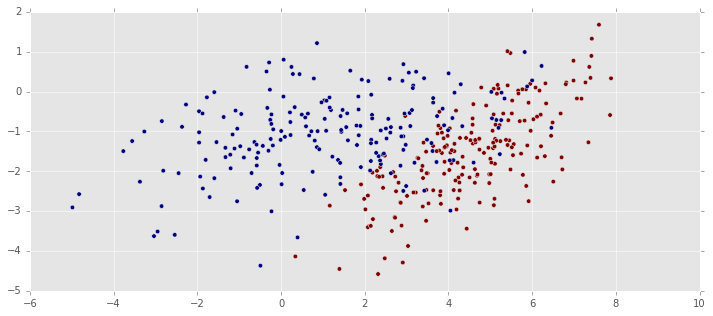

In [6]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:, 0], X[:, 1], c=y)


array([[-0.77257412],
       [ 0.23866995],
       [-0.05834852]])

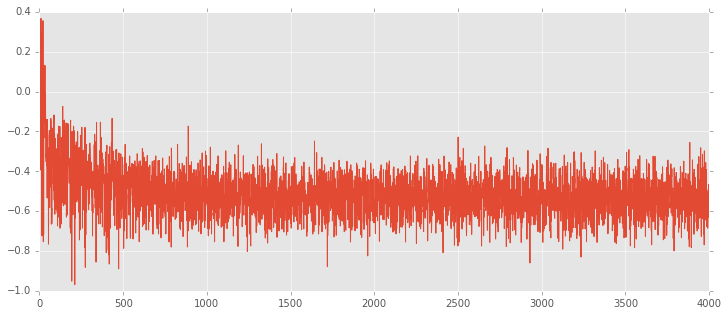

In [7]:
my_clf_log = MySGDClassifier(batch_generator,
                             model_type='log_reg',
                             max_epoch=100,
                             batch_size=10)
my_clf_log.fit(X, y)
plt.plot(np.log(my_clf_log.errors_log['loss']))
my_clf_log.weights


array([[ 0.05235164],
       [ 0.1099416 ],
       [-0.07973381]])

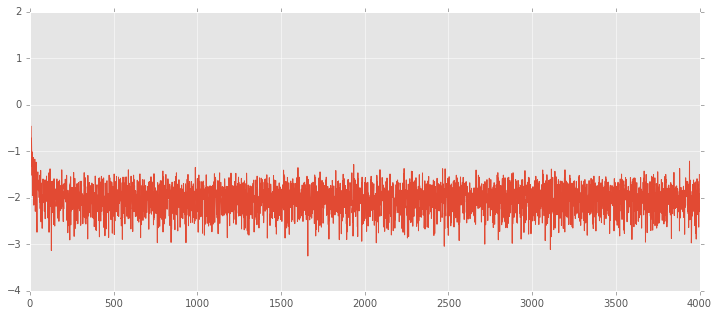

In [9]:
my_clf_lin = MySGDClassifier(batch_generator,
                             model_type='lin_reg',
                             max_epoch=100,
                             batch_size=10)
my_clf_lin.fit(X, y)
plt.plot(np.log(my_clf_lin.errors_log['loss']))
my_clf_lin.weights


Проверим, как на этих данных работает sklearn

In [10]:
sk_linreg = LinearRegression().fit(X, y)
sk_linreg.coef_


array([ 0.14354486, -0.17043888])

In [11]:
sk_logreg = LogisticRegression().fit(X, y)
sk_logreg.coef_


array([[ 1.1027591 , -1.21133169]])

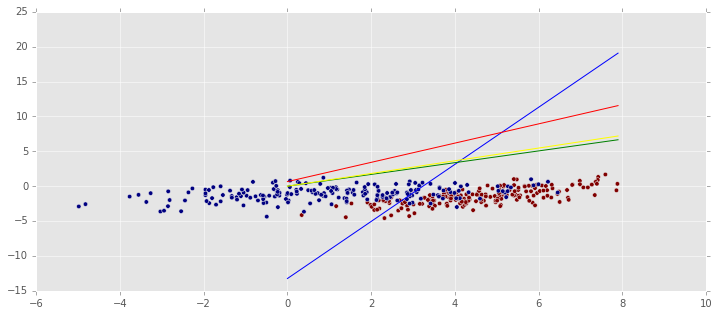

In [12]:
plot_decision_boundary(my_clf_log, c='blue')
plot_decision_boundary(my_clf_lin, c='red')

x = np.arange(0, 8, 0.1)

ylin = (-sk_linreg.coef_[0] * x) / sk_linreg.coef_[1]
ylog = (-sk_logreg.coef_[0][0] * x) / sk_logreg.coef_[0][1]
plt.plot(x, ylin, color='green', label='sk_lin')
plt.plot(x, ylog, color='yellow', label='sk_log')

plt.scatter(X[:, 0], X[:, 1], c=y)


Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [13]:
from sklearn.datasets import make_classification

In [14]:
X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Визуализируем данные:

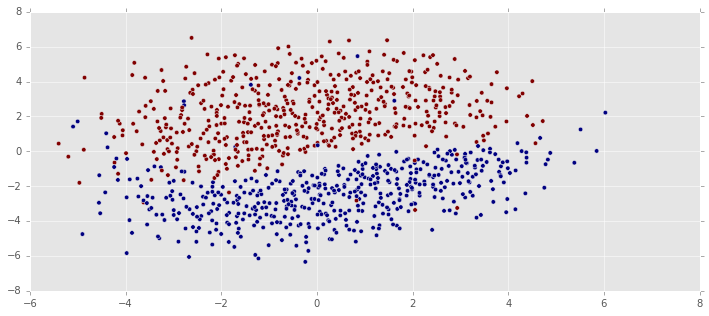

In [15]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X[:1000])
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y[:1000])

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [18]:
def fit_clf_param(X, y, kwargs, param_name, param_values):
    '''
    Генерирует список классификаторов
    с разными занчениями параметра param_name
    '''
    clf_list = []

    for par_val in param_values:
        print(par_val)
        kwargs[param_name] = par_val
        clf = MySGDClassifier(batch_generator, **kwargs).fit(X, y)
        clf_list.append(clf)

    return clf_list


def plot_loss_param(clf_list, N, param_list, title):
    '''
    Рисует лосс, усредненный по N шагам
    для параметра из param_list
    '''
    fig, ax = plt.subplots()
    for clf, param in zip(clf_list, param_list):
        losses = clf.errors_log['loss']
        loss_mean_N = [sum(losses[i:i+N])/N for i in range(0, len(losses), N)]
        ax.plot(np.log(loss_mean_N), label=param)
    ax.legend()
    ax.set_xlabel('Iteration/{}'.format(N))
    ax.set_ylabel('log of loss-function')
    ax.set_title(title)


Строим классификаторы для разных alpha:

In [19]:
alphas = [0.001, 0.01, 0.1, 1, 10]

kwargs_log_b10 = {
    'model_type': 'log_reg',
    'batch_size': 10,
    'max_epoch': 30,
}
clf_logs_b10 = fit_clf_param(X, y, kwargs_log_b10, 'alpha', alphas)

0.001
0.01
0.1
1


c:\python35\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
c:\python35\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in multiply
c:\python35\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
c:\python35\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
c:\python35\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in multiply


10


c:\python35\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in square
c:\python35\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: overflow encountered in multiply


In [22]:
kwargs_lin_b10 = {
    'model_type':'lin_reg',
    'batch_size':10,
    'max_epoch':30, 
}
clf_lins_b10 = fit_clf_param(X, y, kwargs_lin_b10, 'alpha', alphas)

0.001
0.01
0.1
1


c:\python35\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in square
c:\python35\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in square


10


c:\python35\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: overflow encountered in multiply


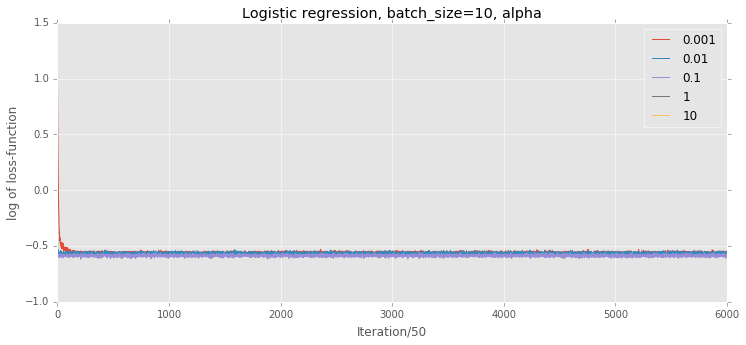

In [23]:
plot_loss_param(clf_logs_b10, 50, alphas, 'Logistic regression, batch_size=10, alpha')

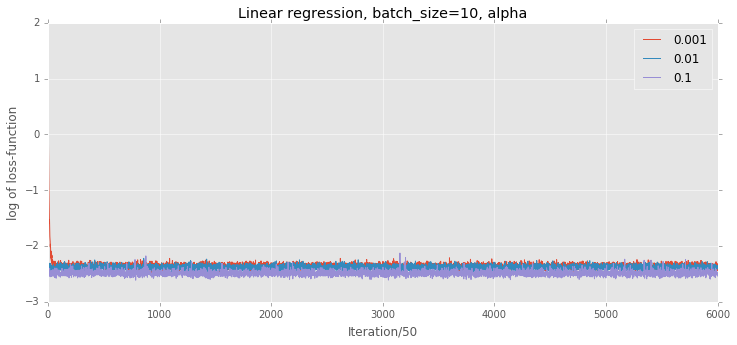

In [31]:
plot_loss_param(clf_lins_b10[0:3], 50, alphas[0:3], 'Linear regression, batch_size=10, alpha')

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

**Ответ**

При $alpha$ больше 1 метод переставал сходиться. Шаг по направлению антиградиента становится слишком большим, поэтому не можем приблизиться к минимуму. При шаге 0.1 значения loss-функции самые низкие, так что в дальнейшем будем использовать это значение.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [25]:
C = np.logspace(3, -3, 10)

In [26]:
kwargs_log_b10['alpha'] = 0.1
kwargs_lin_b10['alpha'] = 0.1

In [27]:
clf_lins_C_b10 = fit_clf_param(X, y, kwargs_lin_b10, 'C', C)

1000.0
215.443469003
46.4158883361
10.0
2.15443469003
0.464158883361
0.1


c:\python35\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in square
c:\python35\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in true_divide
c:\python35\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in square
c:\python35\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in subtract


0.0215443469003


c:\python35\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: overflow encountered in multiply


0.00464158883361
0.001


In [28]:
clf_logs_C_b10 = fit_clf_param(X, y, kwargs_log_b10, 'C', C)

1000.0
215.443469003
46.4158883361
10.0
2.15443469003
0.464158883361
0.1


c:\python35\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
c:\python35\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in multiply
c:\python35\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
c:\python35\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
c:\python35\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in multiply


0.0215443469003


c:\python35\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in true_divide
c:\python35\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in square
c:\python35\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: overflow encountered in multiply


0.00464158883361
0.001


In [29]:
weights_log_b10 = [np.abs(clf.weights).mean() for clf in clf_logs_C_b10]
weights_lin_b10 = [np.abs(clf.weights).mean() for clf in clf_lins_C_b10]

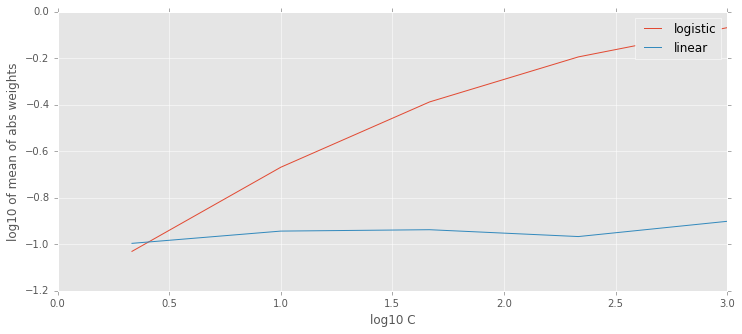

In [30]:
figure, ax =  plt.subplots()

ax.plot(np.log10(C)[:5], np.log10(weights_log_b10[:5]), label='logistic')
ax.plot(np.log10(C)[:5], np.log10(weights_lin_b10[:5]), label='linear')

ax.legend()
ax.set_xlabel('log10 C')
ax.set_ylabel('log10 of mean of abs weights')

При маленьких значениях C градиентный поиск не сходился. Это может быть связано с тем, что, когда мы делим на маленький регуляризационный коэффициент, градиент становится очень большим из-за регуляризационного слагаемого.

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

В линейной регрессии веса не так сильно уменьшились.

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [ ]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


In [ ]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [ ]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [ ]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Домашняя работа очень интересная. Жалко, что не хватило времени сделать всё :( Когда сам реализуешь эти модели, то лучше понимаешь, как всё работает, и это очень здорово.